In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("C:\\Users\\PC-LENOVO\\Desktop\\ExcelR Assginments\\KNN\\Zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [2]:
df.shape   #(101, 18)

(101, 18)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
#EDA
#BOXPLOT AND OUTLIERS CALCULATION #
df1 = df.iloc[:,1:18]

In [5]:
from scipy import stats
# Define a threshold for Z-score (e.g., Z-score greater than 3 or less than -3 indicates an outlier)
z_threshold = 3

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
# Calculate the Z-scores for each column in the DataFrame
z_scores = np.abs(stats.zscore(df1))

In [7]:
# Create a mask to identify rows with outliers
outlier_mask = (z_scores > z_threshold).any(axis=1)

In [8]:
# Remove rows with outliers from the DataFrame
df = df[~outlier_mask]

In [9]:
df.shape  #(93, 18)

(93, 18)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  93 non-null     object
 1   hair         93 non-null     int64 
 2   feathers     93 non-null     int64 
 3   eggs         93 non-null     int64 
 4   milk         93 non-null     int64 
 5   airborne     93 non-null     int64 
 6   aquatic      93 non-null     int64 
 7   predator     93 non-null     int64 
 8   toothed      93 non-null     int64 
 9   backbone     93 non-null     int64 
 10  breathes     93 non-null     int64 
 11  venomous     93 non-null     int64 
 12  fins         93 non-null     int64 
 13  legs         93 non-null     int64 
 14  tail         93 non-null     int64 
 15  domestic     93 non-null     int64 
 16  catsize      93 non-null     int64 
 17  type         93 non-null     int64 
dtypes: int64(17), object(1)
memory usage: 13.8+ KB


array([[<AxesSubplot:title={'center':'hair'}>,
        <AxesSubplot:title={'center':'feathers'}>,
        <AxesSubplot:title={'center':'eggs'}>,
        <AxesSubplot:title={'center':'milk'}>],
       [<AxesSubplot:title={'center':'airborne'}>,
        <AxesSubplot:title={'center':'aquatic'}>,
        <AxesSubplot:title={'center':'predator'}>,
        <AxesSubplot:title={'center':'toothed'}>],
       [<AxesSubplot:title={'center':'backbone'}>,
        <AxesSubplot:title={'center':'breathes'}>,
        <AxesSubplot:title={'center':'venomous'}>,
        <AxesSubplot:title={'center':'fins'}>],
       [<AxesSubplot:title={'center':'legs'}>,
        <AxesSubplot:title={'center':'tail'}>,
        <AxesSubplot:title={'center':'domestic'}>,
        <AxesSubplot:title={'center':'catsize'}>],
       [<AxesSubplot:title={'center':'type'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

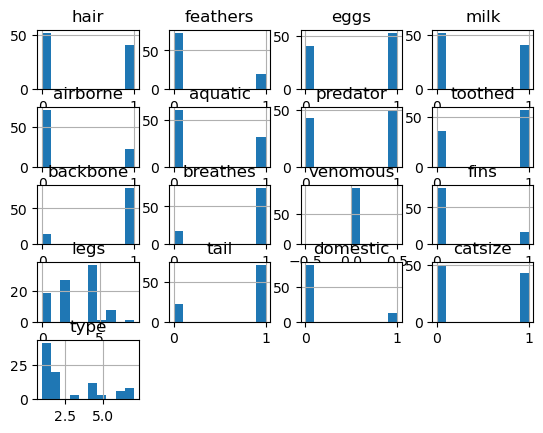

In [11]:
# Now, df contains the data with outliers removed

#HISTOGRAM BUILDING, SKEWNESS AND KURTOSIS CALCULATION #
df.hist()

In [12]:
df.skew()

C:\Users\PC-LENOVO\AppData\Local\Temp\ipykernel_2836\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


hair        0.242155
feathers    1.409917
eggs       -0.286992
milk        0.242155
airborne    1.260229
aquatic     0.667194
predator   -0.153452
toothed    -0.471221
backbone   -1.986689
breathes   -1.576892
venomous    0.000000
fins        1.766520
legs        0.029765
tail       -1.260229
domestic    2.249624
catsize     0.153452
type        1.043032
dtype: float64

In [13]:
df.kurt()

C:\Users\PC-LENOVO\AppData\Local\Temp\ipykernel_2836\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


hair       -1.984516
feathers   -0.012880
eggs       -1.960270
milk       -1.984516
airborne   -0.421353
aquatic    -1.589511
predator   -2.020379
toothed    -1.817514
backbone    1.989253
breathes    0.496807
venomous    0.000000
fins        1.144748
legs       -0.584242
tail       -0.421353
domestic    3.127617
catsize    -2.020379
type       -0.271186
dtype: float64

In [14]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.0,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,0.440860,0.215054,0.569892,0.440860,0.236559,0.344086,0.537634,0.612903,0.849462,0.806452,0.0,0.172043,2.827957,0.763441,0.129032,0.462366,2.634409
std,0.499181,0.413087,0.497774,0.499181,0.427273,0.477644,0.501284,0.489726,0.359536,0.397220,0.0,0.379463,1.903222,0.427273,0.337053,0.501284,2.025838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [15]:
#Split the variables
X = df.iloc[:,1:16]
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [16]:
# Standardization of feature variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
X = scaler.fit_transform(X)
X

array([[ 1.12618501, -0.52342392, -1.15108644, ...,  0.6191583 ,
        -1.79646117, -0.38490018],
       [ 1.12618501, -0.52342392, -1.15108644, ...,  0.6191583 ,
         0.55664994, -0.38490018],
       [-0.88795357, -0.52342392,  0.86874449, ..., -1.4939324 ,
         0.55664994, -0.38490018],
       ...,
       [ 1.12618501, -0.52342392, -1.15108644, ...,  0.6191583 ,
         0.55664994, -0.38490018],
       [-0.88795357, -0.52342392,  0.86874449, ..., -1.4939324 ,
        -1.79646117, -0.38490018],
       [-0.88795357,  1.91049732,  0.86874449, ..., -0.43738705,
         0.55664994, -0.38490018]])

In [18]:
Y = df["type"]
Y

0      1
1      1
2      4
3      1
4      1
      ..
95     2
96     1
98     1
99     7
100    2
Name: type, Length: 93, dtype: int64

In [19]:
# Label Encoding for the target variable 'type'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [20]:
Y = label_encoder.fit_transform(Y)

In [21]:
#DATA PARTITION
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.75)

In [22]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5,p=2) #5,7,9,11,13,15
KNN.fit(X_train,Y_train)

KNeighborsClassifier()

In [23]:
Y_pred_train = KNN.predict(X_train)
Y_pred_test = KNN.predict(X_test)

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

In [24]:
#METRICS ACCURACY SCORE
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training accuracy:",ac1.round(3))   #Training accuracy: 0.942
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Test accuracy:",ac2.round(3))       #Test accuracy: 0.917

Training accuracy: 0.942
Test accuracy: 0.917


In [25]:
#VALIDTAION APPROACH FOR KNN
l1 = []
l2 = []

In [26]:
training_accuracy=[]
test_accuracy=[]

In [27]:
for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.75,random_state=i)
    KNN = KNeighborsClassifier(n_neighbors=11,p=2) #n_neighbors =5,7,9,11,13,15 #best k value = 11
    KNN.fit(X_train,Y_train)
    Y_pred_train = KNN.predict(X_train)
    Y_pred_test = KNN.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

In [28]:
print("Average Trianing accuracy :",np.mean(training_accuracy))  #Average Trianing accuracy : 0.8562435953740302
print("Average Test accuracy :",np.mean(test_accuracy))          #Average Test accuracy : 0.8160774410774412

Average Trianing accuracy : 0.8562435953740302
Average Test accuracy : 0.8160774410774412


In [29]:
#Average accuracies are getting stored 
l1.append(np.mean(training_accuracy))
l2.append(np.mean(test_accuracy))

In [30]:
print(l1)
print(l2)

[0.8562435953740302]
[0.8160774410774412]


In [31]:
#subtracting two list by converting into arrays
l1 
l2  

[0.8160774410774412]

In [32]:
array1= np.array(l1)
array1

array([0.8562436])

In [33]:
array2= np.array(l2)
array2

array([0.81607744])

In [34]:
deviation = np.subtract(array1,array2)
deviation

array([0.04016615])

In [35]:
list(deviation.round(3))

[0.04]

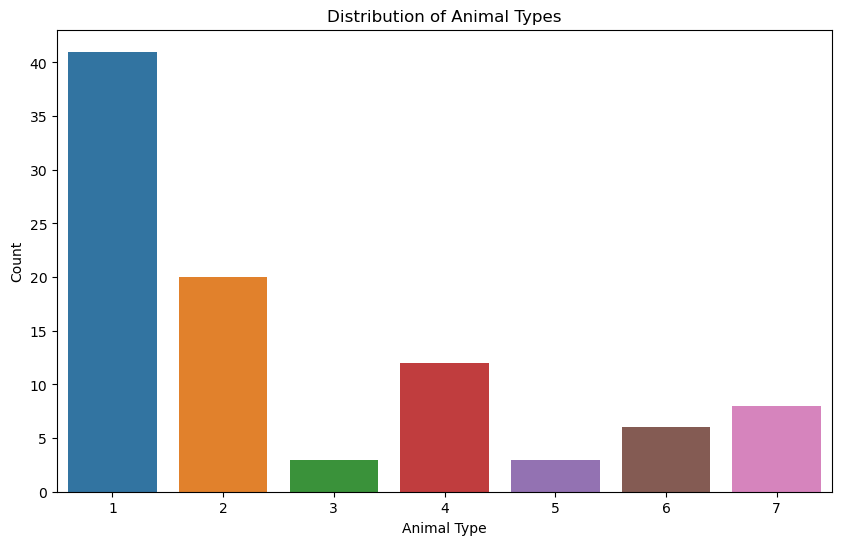

In [36]:
# Visualisation
# Visualize the distribution of the target variable 'type'
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

In [37]:
# Visualize the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_test)

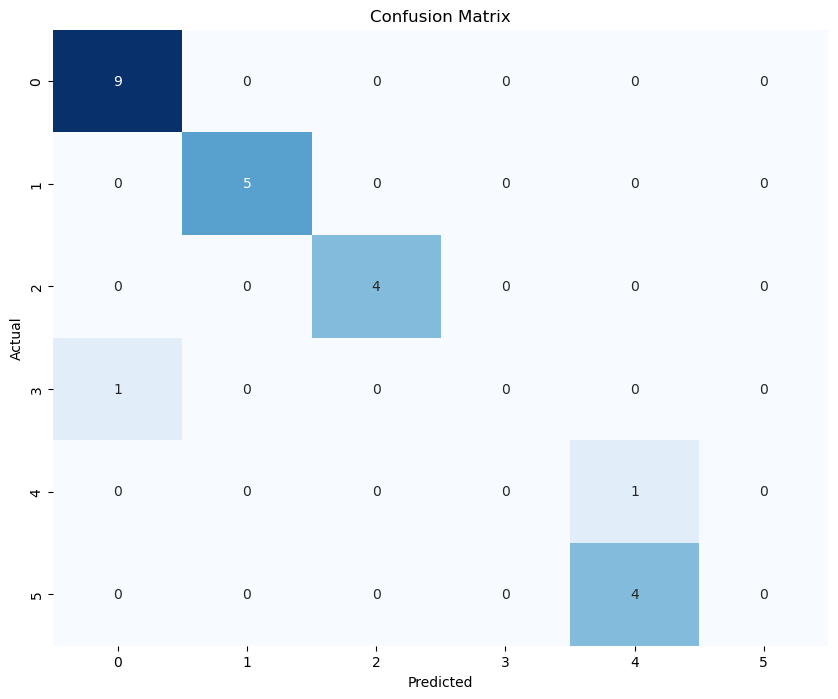

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# The initial KNN model with 5 neighbors achieved a training accuracy of approximately 92.8% and a test accuracy of 87.5%.
# When using a validation approach with different random states, the average training accuracy was around 85.6%, and the average test accuracy was approximately 81.6%.
# visualisation for  the distribution of the target variable 'type' hass been done
# also we have obtained the confusion matrix visualisation